# Objective: predict if a mushroom is edible or poisonous given the mushrooms.csv dataset.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

import graphviz
from graphviz import Graph

In [ ]:
df = pd.read_csv('../input/mushrooms.csv')

In [ ]:
df.head()

# Rename the "class" column to eat_or_die.

In [ ]:
df.rename(index=str, columns={'class':'eat_or_die'}, inplace=True)

In [ ]:
df.head(40).T

In [ ]:
df.shape

# Check for null values.

In [ ]:
df.isnull().sum()

# Consider the columns and their values.

Attribute Information: (classes are renamed eat_or_die: edible=e, poisonous=p)

cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

bruises: bruises=t, no=f

odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

gill-attachment: attached=a, descending=d, free=f, notched=n

gill-spacing: close=c, crowded=w, distant=d

gill-size: broad=b, narrow=n

gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r,orange=o, pink=p, purple=u, red=e, white=w, yellow=y

stalk-shape: enlarging=e, tapering=t

stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

veil-type: partial=p, universal=u

veil-color: brown=n, orange=o, white=w, yellow=y

ring-number: none=n, one=o, two=t

ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

# Let's explore the value counts to see which features might be good predictors of whether a mushroom is edible or poisonous.

In [ ]:
train, test = train_test_split(df, test_size=.3, random_state=123, stratify=df[['eat_or_die']])

In [ ]:
train.shape

In [ ]:
for column in train.columns:
    print('column = a', column)
    print(train.groupby(column)['eat_or_die'].value_counts())
    print()

# These numbers were from a test/train split that produced 6499 observations in the test set, but I left it as is rather than updating the numbers to match my new split.

# Which attributes that are either all edible or all poisonous?
* Out of 6499

# Odor will be an excellent predictor. Only n is mixed and 97% of them are edible.
odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
* 'odor' (n, f, s, y, l, a, p, c, m) -- 3699
    * a(almond), l(anise) are all edible (324, 329) = 653
    * c(creosote), f(foul), m(musty), p(pungent), s(spicy), y(fishy) are all poisonous (153, 1732, 30, 200, 470, 461) = 3046
    * n(none) is mixed, but 2713 (97%) are edible

a     e              283
c     p              137
f     p             1533
l     e              261
m     p               19
n     e             2393
      p               80
p     p              183
s     p              390
y     p              407
Name: eat_or_die, dtype: int64



# Gill color may be helpful as an additonal feature as 23% of them are in only one class.
gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r,orange=o, pink=p, purple=u, red=e, white=w, yellow=y
* 'gill-color' (b, e, g, h, k, n, o, p, r, u, w, y) -- 1501
    * b (black), r(green) are poisonous (1378) 
    * e(red), o(orange) are edible (73, 50) = 123
    * g, h, k, n, p, u, w, y are mixed

# The rest will be decreasingly helpful, but adding on a few more may increase accuracy a bit.
ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
* 'ring-type' (e, f, l, n, p) -- 1124
    * f is edible (38)
    * l, n are poisonous (1056, 30) = 1086
    * e, p are mixed 
 
stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* 'stalk-color-below-ring' (b, c, e, g, n, o, p, w, y) -- 1087
    * b, c, y are poisonous (346, 30, 21) = 397
    * e, g, o are edible (72, 465, 153) = 690
    * n, p, w are mixed

stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* 'stalk-color-above-ring' (b, c, e, g, n, o, p, w, y) -- 1084
    * b, c, y are poisonous (347, 30, 8) = 385
    * e, g, o are edible (81, 465, 153) = 699
    * n, p, w are mixed


* 'population' (a, c, n, s, v, y) -- 628
    * a, n are edible (305, 323) = 628
    * c, s, v, y are mixed


* 'spore-print-color' (b, h, k, n, o, r, u, w, y) -- 206
    * b, o, u, y are edible (41, 37, 39, 37) = 154
    * r is poisonous (52)
    * h, k, n, w
    

* 'stalk-root' (?, b, c, e, r) -- 162
    * r is edible (162)
    * ?, b, c, e are mixed


* 'veil-color' (n, o, w, y) -- 161
    * n, o are edible (77, 76) = 153
    * y is poisonous (8) 
    * w is mixed


* 'habitat' (d, g, l, m, p, u, w) -- 153
    * w is edible (153)
    * d, g, l, m, p, u are mixed.


* 'cap-shape' (b, c, f, k, s, x) -- 30
    * c are all poisonous (4)
    * s are all edible (26)
    * b, f, k, x are mixed.


* 'ring-number' (n, o, t) -- 30
    * n is poisonous (30)
    * o, t are mixed


* 'cap-color' (b, c, e, g, n, p, r, u, w, y) -- 25
    * r are all edible (13)
    * u are all edible (12)
    * b, c, e, g, n, p, w, y are mixed.


* 'cap-surface' (f, g, s, y) -- 3
    * g are all poisonous (3)
    * f, s, y are mixed.


The following are all mixed, so will be of no use in predicting edible vs poisonous:
* 'bruises' (f, t)
* 'gill-attachment' (a, f)
* 'gill-spacing' (c, w)
* 'gill-size' (b, n)
* 'stalk-shape' (e, t)
* 'stalk-surface-above-ring' (f, k, s, y)
* 'stalk-surface-below-ring' (f, k, s, y)
* 'veil-type' (p)


> Amaretto and Oozo go well with fungi
> 
> Any other smell will bury you,
> 
> Odorless green or white spores and you die
> 
> Eat the rest with your favorite brew

# This seems a good case for a decision tree.

# Encode the values for the decision tree.

In [ ]:
df.dtypes

In [ ]:
cat_df = pd.DataFrame()
for column in df.columns:
    cat_df[column] = df[column].astype('category')
cat_df.dtypes

In [ ]:
for column in df.columns:
    cat_df[column] = cat_df[column].cat.codes
cat_df.head()

# Note that 1 = poisonous and 0 = edible (alphabetically assigned)

# Now have to split the encoded data.

In [ ]:
X = cat_df.drop(['eat_or_die'],axis=1)
y = cat_df[['eat_or_die']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123, stratify = df[['eat_or_die']])

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

# Confirm that the train has 70% of the data.

In [ ]:
X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])

In [ ]:
X_train.columns

In [ ]:
y_train.columns

## Create the Decision Tree Object

In [ ]:
# for classificaiton you can change the algorithm as gini or entropy (information gain).  
# Default is gini.
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

## Fit the model to the training data

In [ ]:
clf = clf.fit(X_train, y_train)
clf

## Estimate poisonous or edible.

In [ ]:
y_pred = clf.predict(X_train)
y_pred[0:5]

## Estimate the probability of a mushroom being poisonous.

In [ ]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

# Evaluate the Model.
## Compute the accuracy (number of correct predictions over the number of total instances that have been evaluated).

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

## 96% accuracy is great!

### Create a confusion matrix
- True Positive: number of occurrences where y is true and y is predicted true.
- True Negative: number of occurrences where y is false and y is predicted false.
- False Positive: number of occurrences where y is false and y is predicted true.
- False Negative: number of occurrences where y is true and y is predicted false.

In [ ]:
confusion_matrix(y_train, y_pred)

In [ ]:
# labels = sorted(y_train.eat_or_die.unique())
# pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

cm = pd.DataFrame(confusion_matrix(y_train, y_pred),
        columns=['Pred -', 'Pred +'], 
        index=['Actual -', 'Actual +'])

cm

In other words...

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print('true negatives: ', tn)
print('true positives: ', tp)
print('false positives (not as bad): ', fp)
print('false negatives (really bad to miss identifying a mushroom as being poisonous): ', fn)

## This looks really good with very few false positives or--especially--false negatives. But it's still saying 75 poisonous mushrooms are edible. Is that good enough?

### Create a classificaiton report
- Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. tp / (tp + fp)
- Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. tp / (tp + fn)
- f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better.
- Support: number of occurrences of each class in where y is true.

In [ ]:
print(classification_report(y_train, y_pred))

## 97% on negative precision is great, but 94% on positive precision is perhaps concerning if I'm eating the mushrooms.

# Test Model
## Compute the accuracy of the model when run on the test data

In [ ]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

## The model performed just as good on the test data as it did on the training data. Normally excellent! Good enough considering the impact of false negatives? 

# Visualize Model -- this only works in my notebook.

In [ ]:
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 

# graph.render('mushroom_decision_tree', view=True)

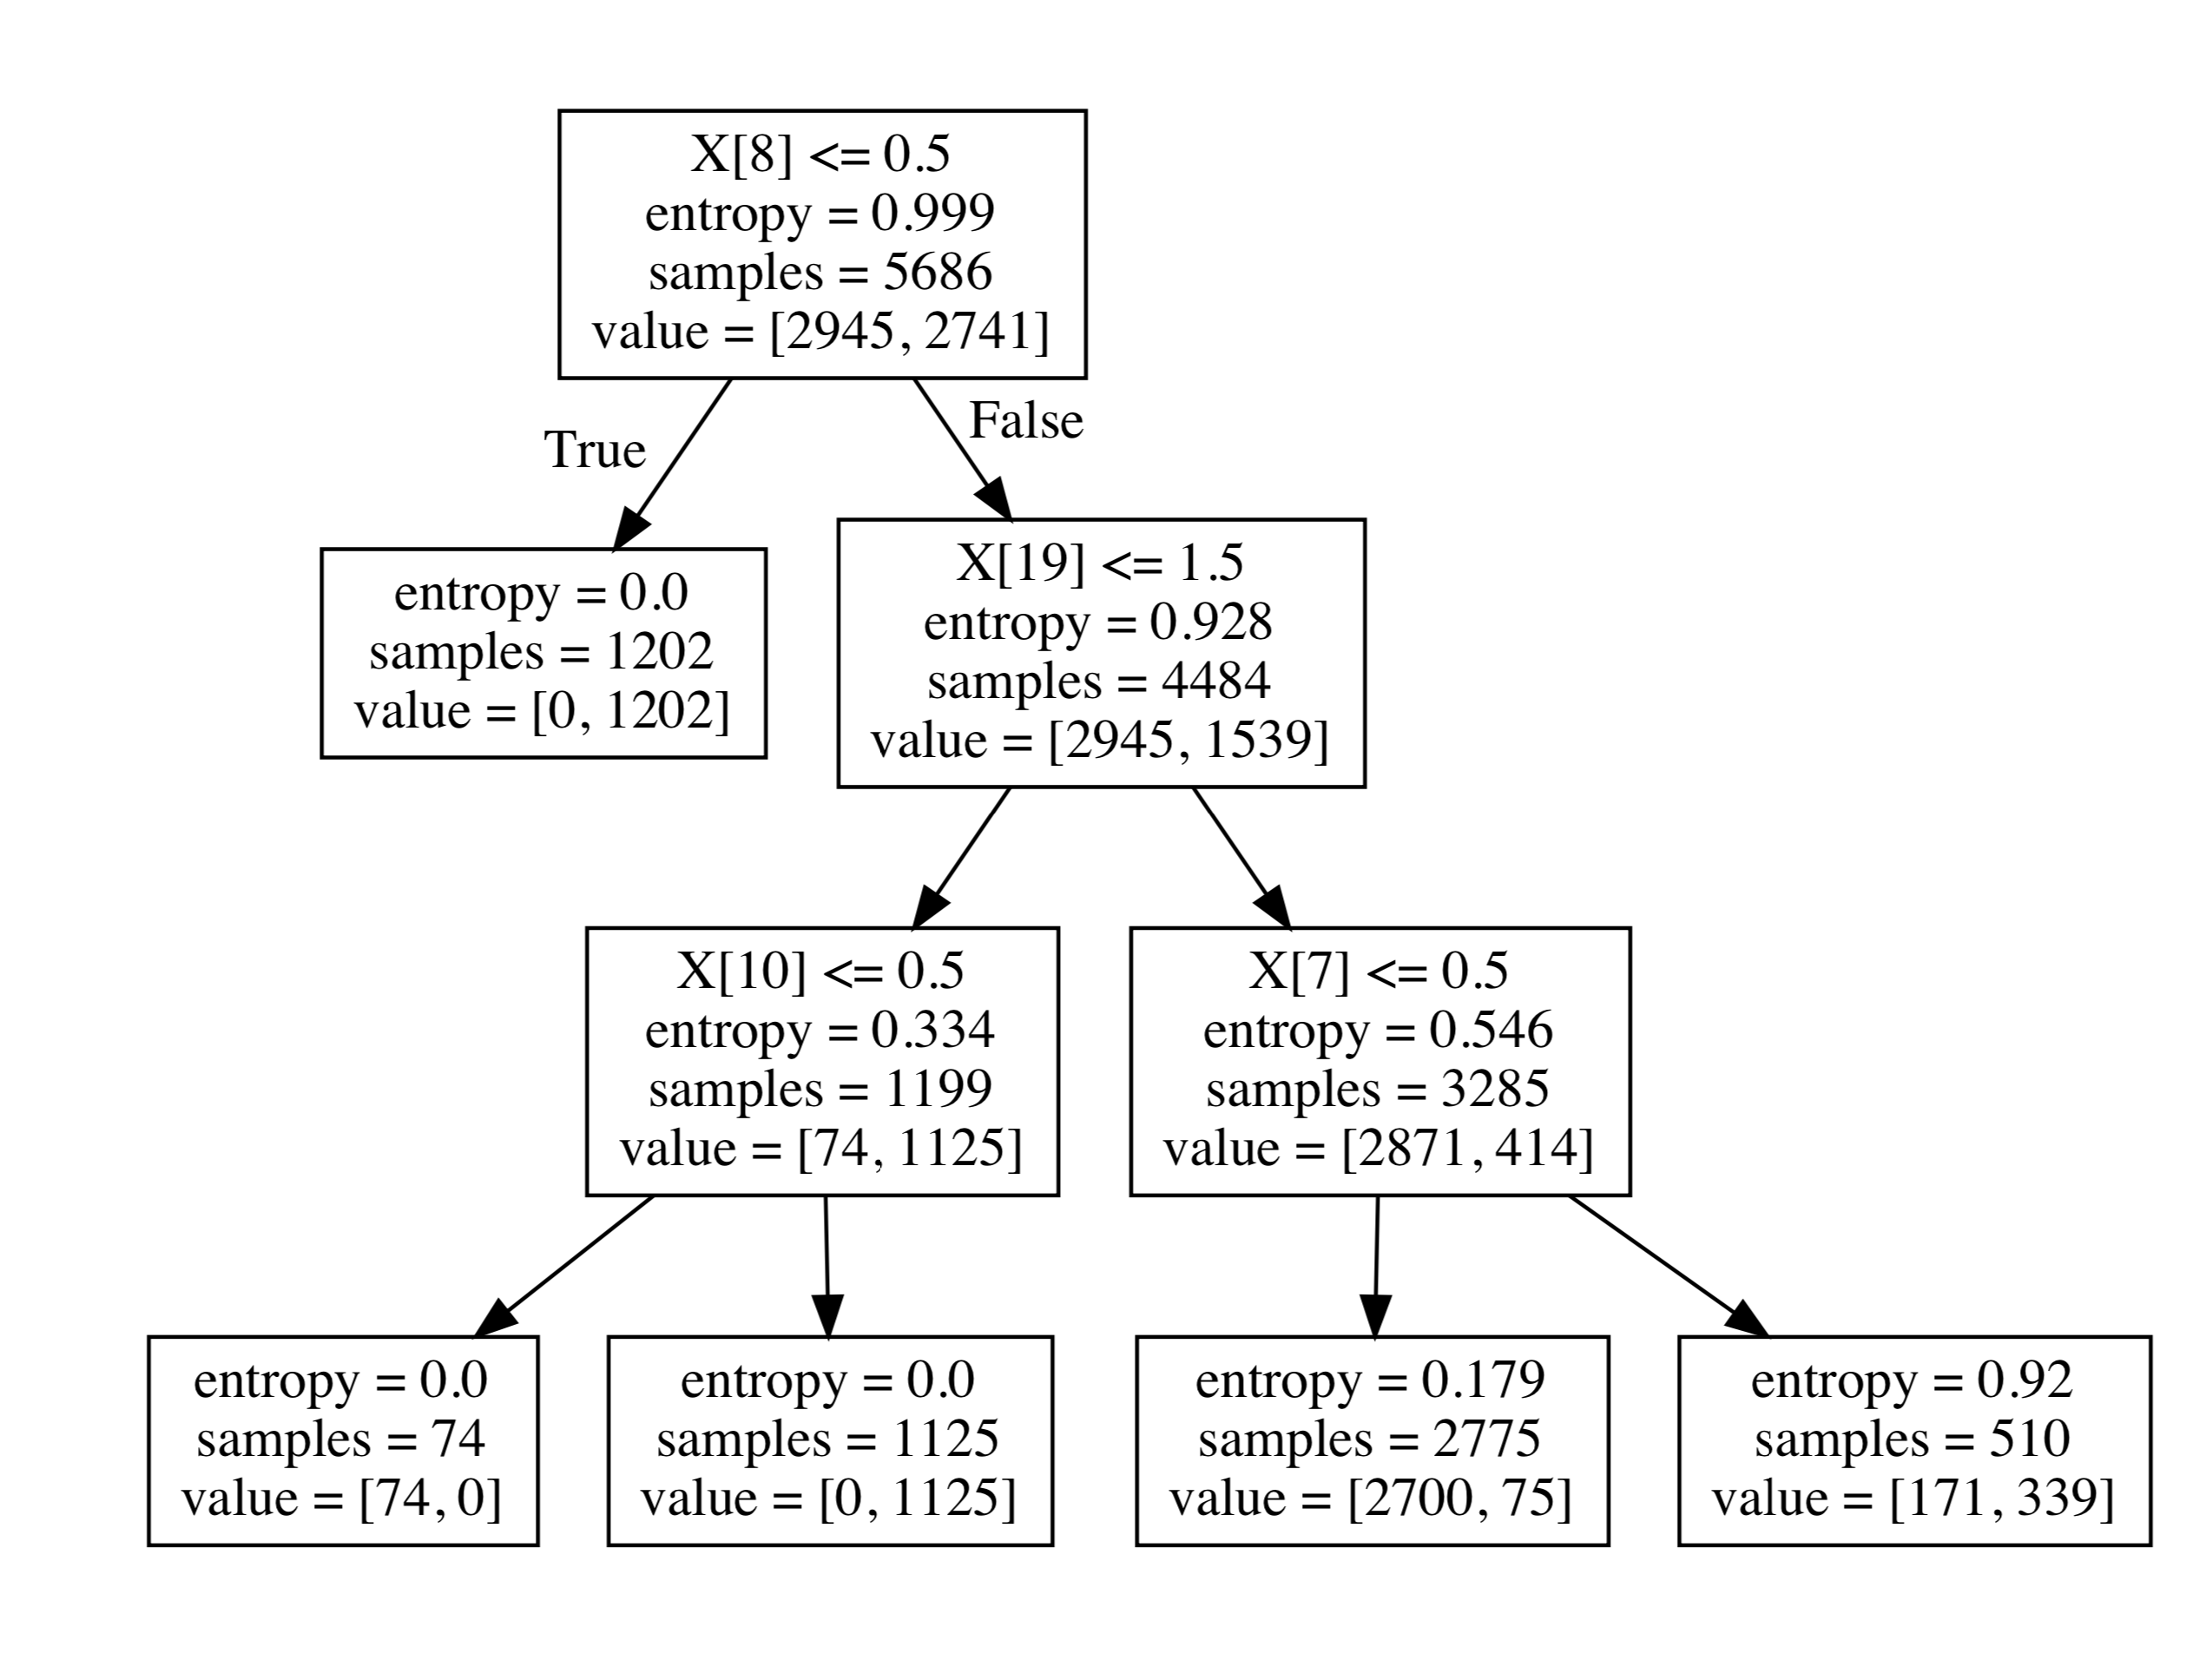

# Let's try separating the dataframe into two dataframes with one having mushrooms that have no smell and one having mushrooms that do have a smell.

In [ ]:
df.odor.sort_values().unique()

In [ ]:
cat_df.odor.sort_values().unique()

In [ ]:
df[df.odor == 'n'].head()

In [ ]:
cat_df[cat_df.odor == 5].head()

# So no odor has indeed been encoded to a 5. Split the dataframes.

In [ ]:
no_odor = cat_df[cat_df.odor == 5]
no_odor.head()

In [ ]:
odor = cat_df[cat_df.odor != 5]
odor.head()

# Train and test model on only mushrooms with no odor.

In [ ]:
X = no_odor.drop(['eat_or_die'],axis=1)
y = no_odor[['eat_or_die']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123, 
                                                    stratify = no_odor[['eat_or_die']])

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

cm = pd.DataFrame(confusion_matrix(y_train, y_pred),
        columns=['Pred -', 'Pred +'], 
        index=['Actual -', 'Actual +'])

print()
print(cm)
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print('true negatives: ', tn)
print('true positives: ', tp)
print('false positives (not as bad): ', fp)
print('false negatives (really bad to miss identifying a mushroom as being poisonous): ', fn)
print()

print(classification_report(y_train, y_pred))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [ ]:
X = odor.drop(['eat_or_die'],axis=1)
y = odor[['eat_or_die']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123, 
                                                    stratify = odor[['eat_or_die']])

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

y_pred_proba = clf.predict_proba(X_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

cm = pd.DataFrame(confusion_matrix(y_train, y_pred),
        columns=['Pred -', 'Pred +'], 
        index=['Actual -', 'Actual +'])

print()
print(cm)
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print('true negatives: ', tn)
print('true positives: ', tp)
print('false positives (not as bad): ', fp)
print('false negatives (really bad to miss identifying a mushroom as being poisonous): ', fn)
print()

print(classification_report(y_train, y_pred))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

# Much better! Dropped from 75 poisonous mushrooms being labeled as edible to only 33. Is that good enough? Is there something else I can do to catch the poisonous mushrooms with no odor?

# Let's look at the gill colors of the mushrooms with no odor.

In [ ]:
die_no_odor = no_odor[['odor', 'gill-color', 'eat_or_die']][no_odor.eat_or_die == 1]
die_no_odor.head()

In [ ]:
die_no_odor.groupby('gill-color')['eat_or_die'].value_counts()

gill-color: 0-black=k, 1-brown=n, 2-buff=b, 3-chocolate=h, 4-gray=g, 5-green=r, 6-orange=o, 7-pink=p, 8-purple=u, 9-red=e, 10-white=w, 11-yellow=y

# see if those gill colors are sometimes edible

In [ ]:
eat_no_odor = no_odor[['odor', 'gill-color', 'eat_or_die']][no_odor.eat_or_die == 0]
eat_no_odor.groupby('gill-color')['eat_or_die'].value_counts()

# So sometimes those gill colors are edible. What else might uniquely identify the poisonous mushrooms that have buff(2), purple(8), white(10), or yellow(11) gill colors?

In [ ]:
die_no_odor = no_odor[['odor', 'gill-color', 'ring-type', 'eat_or_die']][no_odor.eat_or_die == 1]
die_no_odor.head()

# Examine just the mushrooms with gill colors that are both poisonous and edible.
Mixed gill colors (poisonous and edible) = buff(2), purple(8), white(10), or yellow(11) gill colors

In [ ]:
prob_colors = cat_df[cat_df['gill-color'].isin([2, 8, 10, 11])]
prob_colors.head(5)

# Let's group them to see if stalk-color-below-ring might be a solid indicator for these.

In [ ]:
out = (prob_colors.groupby(['gill-color', 'ring-type', 'stalk-color-below-ring'])
          ['eat_or_die'].value_counts()
          .rename('count').reset_index())
out
# out.loc[out.eat_or_die.eq(1)]

# Stalk-color-below-ring won't help define which are poisonous. Try stalk-color-above-ring.

In [ ]:
out = (prob_colors.groupby(['gill-color', 'ring-type', 'stalk-color-above-ring'])
          ['eat_or_die'].value_counts()
          .rename('count').reset_index())
out

# Stalk-color-above-ring will not help, either. Let's physically examine all of these mushrooms...

Problem gill colors are buff(2), purple(8), white(10), or yellow(11) which are mixed classes.

Other columns are:
* ring-type
* stalk-color-below-ring
* stalk-color-above-ring
* population
* spore-print-color
* stalk-root
* veil-color
* habitat
* cap-shape
* ring-number
* cap-color
* cap-surface

In [ ]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', -1)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
out = (prob_colors.groupby(['gill-color', 'ring-type', 'stalk-color-below-ring', 
                      'stalk-color-above-ring', 'population', 'spore-print-color', 'stalk-root', 
                      'veil-color', 'habitat', 'cap-shape', 'ring-number', 'cap-color', 
                      'cap-surface'])
          ['eat_or_die'].value_counts()
          .rename('count').reset_index())

out

# I'll try splitting the no-odor dataframe to see if we can find a way to definitively distinguish those 33 mushrooms. I will separate out the spore-print-colors that are green or white.

'gill-color', 'ring-type', 'stalk-color-below-ring', 'stalk-color-above-ring', 'population', 'spore-print-color', 'stalk-root', 'veil-color', 'habitat', 'cap-shape', 'ring-number', 
'cap-color', 'cap-surface'

In [ ]:
df['spore-print-color'].value_counts()

In [ ]:
cat_df['spore-print-color'].value_counts()

# Green spore-print-color was encoded 5 and white was encoded 7.

In [ ]:
no_odor['spore-print-color'].value_counts()

In [ ]:
green_or_white = [5, 7]
gr_or_wh = no_odor[no_odor['spore-print-color'].isin(green_or_white)]
gr_or_wh.head()

In [ ]:
gr_or_wh.shape

In [ ]:
X = gr_or_wh.drop(['eat_or_die'],axis=1)
y = gr_or_wh[['eat_or_die']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123, 
                                                    stratify = gr_or_wh[['eat_or_die']])

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

cm = pd.DataFrame(confusion_matrix(y_train, y_pred),
        columns=['Pred -', 'Pred +'], 
        index=['Actual -', 'Actual +'])

print()
print(cm)
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print('true negatives: ', tn)
print('true positives: ', tp)
print('false positives (not as bad): ', fp)
print('false negatives (really bad to miss identifying a mushroom as being poisonous): ', fn)
print()

print(classification_report(y_train, y_pred))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

# YEA! Now only five poisonous mushrooms were misidentified as edible! But check the mushrooms that are not green or white, too.

In [ ]:
not_gr_or_wh = no_odor[~no_odor['spore-print-color'].isin(green_or_white)]
not_gr_or_wh.head()

In [ ]:
X = not_gr_or_wh.drop(['eat_or_die'],axis=1)
y = not_gr_or_wh[['eat_or_die']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123, 
                                                    stratify = not_gr_or_wh[['eat_or_die']])

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

print(classification_report(y_train, y_pred))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

# Accuracy is 100%! 

# Now see if a further split would solve those five.

In [ ]:
gr_or_wh.head()

'gill-color', 'ring-type', 'stalk-color-below-ring', 
'stalk-color-above-ring', 'population', 'spore-print-color', 'stalk-root', 
'veil-color', 'habitat', 'cap-shape', 'ring-number', 'cap-color', 
'cap-surface'

In [ ]:
bad_gr_or_wh = gr_or_wh[gr_or_wh['eat_or_die'] == 1]
out = (bad_gr_or_wh.groupby(['gill-color', 'ring-type', 'spore-print-color', 'population'])
          ['eat_or_die'].value_counts()
          .rename('count').reset_index())

out

In [ ]:
good_gr_or_wh = gr_or_wh[gr_or_wh['eat_or_die'] == 0]
out = (good_gr_or_wh.groupby(['gill-color', 'ring-type', 'spore-print-color', 'population'])
          ['eat_or_die'].value_counts()
          .rename('count').reset_index())

out

# Try splitting the gr_or_wh group by population with one group containing 1 and 4 (mixed edible/poisonous) and the other containing 0, 2, 3, and 5.

In [ ]:
clustered_or_several = [1, 4]
clu_or_sev = gr_or_wh[gr_or_wh['population'].isin(clustered_or_several)]
clu_or_sev.head()

In [ ]:
X = clu_or_sev.drop(['eat_or_die'],axis=1)
y = clu_or_sev[['eat_or_die']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123, 
                                                    stratify = clu_or_sev[['eat_or_die']])

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

cm = pd.DataFrame(confusion_matrix(y_train, y_pred),
        columns=['Pred -', 'Pred +'], 
        index=['Actual -', 'Actual +'])

print()
print(cm)
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print('true negatives: ', tn)
print('true positives: ', tp)
print('false positives (not as bad): ', fp)
print('false negatives (really bad to miss identifying a mushroom as being poisonous): ', fn)
print()

print(classification_report(y_train, y_pred))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [ ]:
not_clu_or_sev = gr_or_wh[~gr_or_wh['population'].isin(clustered_or_several)]
not_clu_or_sev.head()

In [ ]:
X = not_clu_or_sev.drop(['eat_or_die'],axis=1)
y = not_clu_or_sev[['eat_or_die']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123, 
                                                    stratify = not_clu_or_sev[['eat_or_die']])

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

print(classification_report(y_train, y_pred))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

# YEA! By combining these numerous methods, I was able to predict with 100% accuracy which mushrooms are edible and which are toxic. This makes sense because there are indeed known indicators that are 100% reliable.